<a href="https://colab.research.google.com/github/NagasaiReddyMala/Predict_future_Sales_Capstone/blob/main/Predict_Future_Sales_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data

In [3]:
# uploading google colab json file 
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nagasaireddymala","key":"bd1f7981308433cb90a350c1f06b8805"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
# download kaggle dataset
!kaggle competitions download -c competitive-data-science-predict-future-sales  

 33% 5.00M/15.1M [00:00<00:00, 47.1MB/s]
100% 15.1M/15.1M [00:00<00:00, 97.0MB/s]


In [6]:
!unzip -q "competitive-data-science-predict-future-sales"

In [7]:
#we have to import required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# EDA Stage

In [60]:
# reading all the csv files in the dataset
train_data = pd.read_csv("sales_train.csv") 
test_data = pd.read_csv("test.csv")
items_data = pd.read_csv("items.csv")
item_cat_data = pd.read_csv("item_categories.csv")
shops_data = pd.read_csv("shops.csv")
submission_data = pd.read_csv("sample_submission.csv")


In [9]:
train_data.shape #shape of train data

(2935849, 6)

In [61]:
test_data.shape #shape of test data

(214200, 3)

In [10]:
items_data.shape #shape of items data 

(22170, 3)

In [11]:
item_cat_data.shape #shape of item categories data 

(84, 2)

In [12]:
shops_data.shape #shape of shops data 

(60, 2)

In [14]:
submission_data.shape #shape of sample submission data

(214200, 2)

In [15]:
train_data.head() #reading top 5 rows in train csv 


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [16]:
items_data.head() # reading top 5 rows in items csv 

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [17]:
item_cat_data.head() # reading top 5 rows in item_cat csv 

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [18]:
shops_data.head() # reading top 5 rows in shops csv

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [19]:
test_data.head() # reading top 5 rows in test csv 

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [20]:
submission_data.head() # reading top 5 rows in submissions csv 

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [21]:
#defining basic_eda
def basic_eda(df):
    print("----------INFO-----------------")
    print(df.info())
    print("----------Describe-------------")
    print(df.describe())
    print("----------Columns--------------")
    print(df.columns)
    print("----------Data Types-----------")
    print(df.dtypes)
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print("-------NULL values-------------")
    print(df.isna().sum())

In [22]:
#breif exploration of data
print("=============================Sales Data=============================")
basic_eda(train_data)
print("=============================Test data=============================")
basic_eda(test_data)
print("=============================Item Categories=============================")
basic_eda(item_cat_data)
print("=============================Items=============================")
basic_eda(items_data)
print("=============================Shops=============================")
basic_eda(shops_data)
print("=============================Sample Submission=============================")
basic_eda(submission_data)

=============================Sales Data=============================
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
None
----------Describe-------------
       date_block_num       shop_id       item_id    item_price  item_cnt_day
count    2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06  2.935849e+06
mean     1.456991e+01  3.300173e+01  1.019723e+04  8.908532e+02  1.242641e+00
std      9.422988e+00  1.622697e+01  6.324297e+03  1.729800e+03  2.618834e+00
min      0.000000e+00  0.000000e+00  0.000000e+00 -1.000000e+00 -2.200000e+01
25%      7.000000e+00  2.200000e+01  4.476000e+03  2.490000e+02 

In [23]:
#To find the duplicate values in train data
print("Number of Duplicates" ,len(train_data[train_data.duplicated()]))

Number of Duplicates 6


In [24]:
#converting 'date' column in df_train to datetime format
train_data['date'] = pd.to_datetime(train_data['date'],format = '%d.%m.%Y')


In [25]:
#printing top 5 rows in train csv after the conversion 
train_data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [26]:
#printing the records in train data 
print("We have records from date {} to {}".format(train_data.date.min().date(),train_data.date.max().date()))

We have records from date 2013-01-01 to 2015-10-31


In [27]:
#Merging items data to train data and finding unique values in it 
train_data2 = train_data.merge(items_data, on='item_id', how='left' )
print("shop ids in train data:", len(train_data.shop_id.unique()), " Out of:", len(shops_data.shop_id.unique()))
print("item ids in train data:", len(train_data.item_id.unique()), " Out of:", len(items_data.item_id.unique()))
print("item cataegory ids in train data:", len(train_data2.item_category_id.unique()), " Out of:", len(items_data.item_category_id.unique()))


shop ids in train data: 60  Out of: 60
item ids in train data: 21807  Out of: 22170
item cataegory ids in train data: 84  Out of: 84


In [28]:
#Merging items data to test data and finding unique values in it
test_data2 = test_data.merge(items_data, on='item_id', how='left' )
print("shop ids in test data:", len(test_data.shop_id.unique()), " Out of:", len(shops_data.shop_id.unique()))
print("item ids in test data:", len(test_data.item_id.unique()), " Out of:", len(items_data.item_id.unique()))
print("item cataegory ids in test data:", len(test_data2.item_category_id.unique()), " Out of:", len(items_data.item_category_id.unique()))

shop ids in test data: 42  Out of: 60
item ids in test data: 5100  Out of: 22170
item cataegory ids in test data: 62  Out of: 84


# Analyzing Outliers

90th percenile value of item count: 2.0
91th percenile value of item count: 2.0
92th percenile value of item count: 2.0
93th percenile value of item count: 2.0
94th percenile value of item count: 2.0
95th percenile value of item count: 2.0
96th percenile value of item count: 2.0
97th percenile value of item count: 3.0
98th percenile value of item count: 3.0
99th percenile value of item count: 5.0
100th percenile value of item count: 2169.0


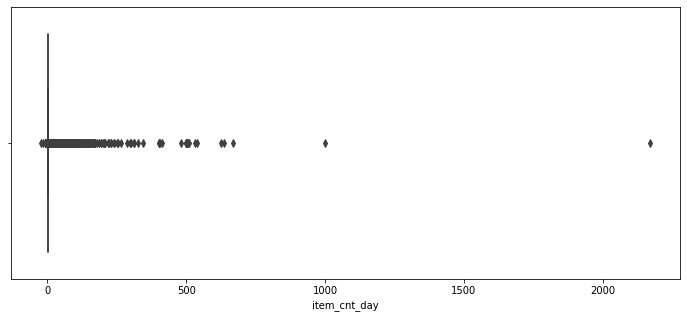

In [29]:
#Outliers analysis on item_cnt_day column in train data 
plt.figure(figsize=(12,5))
sns.boxplot(x=train_data.item_cnt_day)
for i in range(90,101):
  print("{}th percenile value of item count: {}".format(i,np.percentile(train_data.item_cnt_day.values,i)))
outlier_itemcount = np.percentile(train_data.item_cnt_day.values,100)

99% of training records has less 5 or less item count

Only 1% of training records has more than 5 item count

90th percenile value of item price: 1999.0
91th percenile value of item price: 2090.0
92th percenile value of item price: 2299.0
93th percenile value of item price: 2499.0
94th percenile value of item price: 2599.0
95th percenile value of item price: 2690.0
96th percenile value of item price: 2999.0
97th percenile value of item price: 3190.0
98th percenile value of item price: 3590.0
99th percenile value of item price: 5999.0
100th percenile value of item price: 307980.0


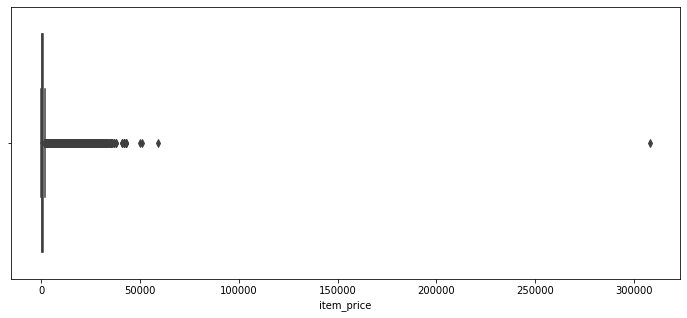

In [30]:
#Outliers analysis on item_price column in train data
plt.figure(figsize=(12,5))
sns.boxplot(x=train_data.item_price)
for i in range(90,101):
  print("{}th percenile value of item price: {}".format(i,np.percentile(train_data.item_price.values,i)))
outlier_itemprice = np.percentile(train_data.item_price.values,100)

99% of traning records has 5999 or less item price

Only 1% of training records has more than 5999 item price

# Shop Wise Selling

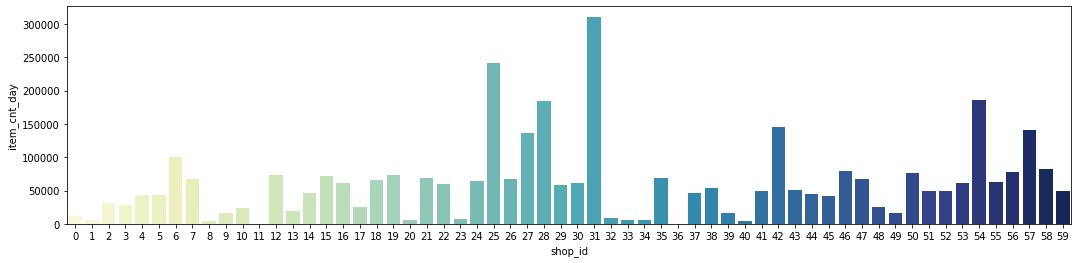

In [31]:
# plotting a bar graph for the number of items sold in all the shops
train_data3 = train_data.groupby(['shop_id'], as_index=False)['item_cnt_day'].sum()
plt.figure(figsize=(18,4))
sns.barplot(y="item_cnt_day",x="shop_id", data=train_data3, palette='YlGnBu')
plt.show()

# Item category wise selling


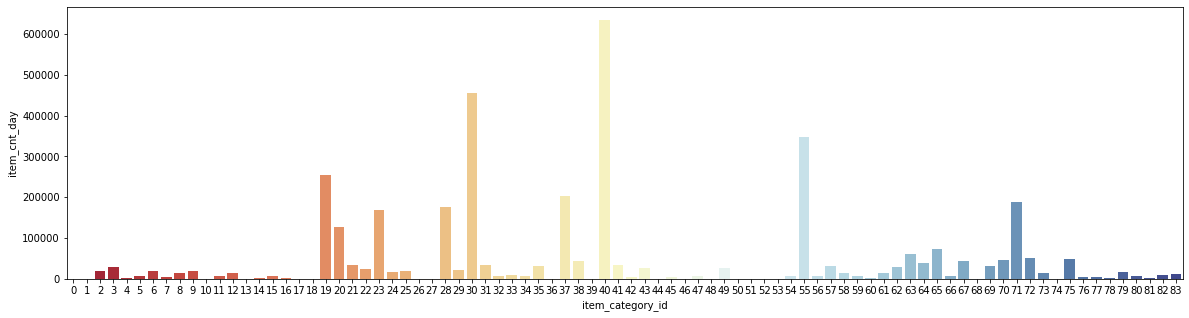

In [32]:
# plotting a bar graph for the number of items sold in all the item categories 
train_data3 = train_data2.groupby(['item_category_id'], as_index=False)['item_cnt_day'].sum()
plt.figure(figsize=(20,5))
sns.barplot(x="item_category_id",y="item_cnt_day", data = train_data3, palette='RdYlBu')
plt.show()

# Month wise selling

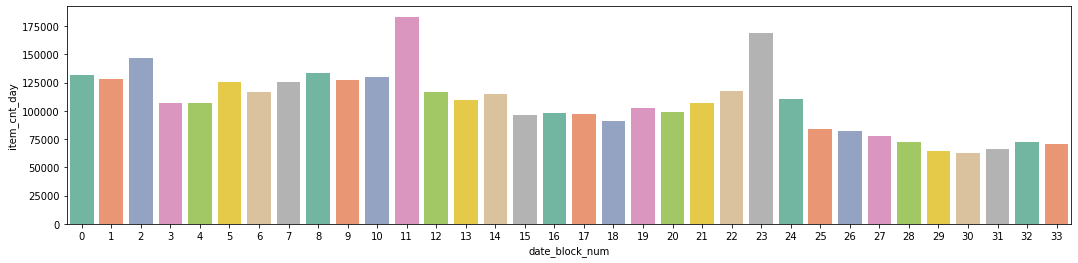

In [33]:
# plotting a bar graph for the number of items sold in all the months from date 2013-01-01 to 2015-10-31
train_data3 = train_data.groupby(['date_block_num'], as_index=False)['item_cnt_day'].sum()
plt.figure(figsize=(18,4))
sns.barplot(x="date_block_num",y="item_cnt_day", data = train_data3, palette='Set2')
plt.show()

# EDA on shop_id and item_id exist in test data

In [34]:
#data analysis on shop_id and test_id in test data
shop_in_test = test_data['shop_id'].unique() #test_shop = shop_in_test
item_in_test = test_data['item_id'].unique()
# Only shops that exist in test data
train_new = train_data[train_data['shop_id'].isin(shop_in_test)] #_train = train_new
# Only items that exist in test data
train_set = train_new[train_new['item_id'].isin(item_in_test)]

In [35]:
#Excluding unwanted shop and item ids in train data 
print("shape after exluding unwanted shop and item ids ",train_new.shape) 

shape after exluding unwanted shop and item ids  (2413246, 6)


In [36]:
#Printing duplicate values in new train data 
print("Number of Duplicates" ,len(train_new[train_new.duplicated()]))

Number of Duplicates 5


# Outlier Analysis on new train data 

90th percenile value of item count: 2.0
91th percenile value of item count: 2.0
92th percenile value of item count: 2.0
93th percenile value of item count: 2.0
94th percenile value of item count: 2.0
95th percenile value of item count: 2.0
96th percenile value of item count: 2.0
97th percenile value of item count: 3.0
98th percenile value of item count: 3.0
99th percenile value of item count: 5.0
100th percenile value of item count: 2169.0


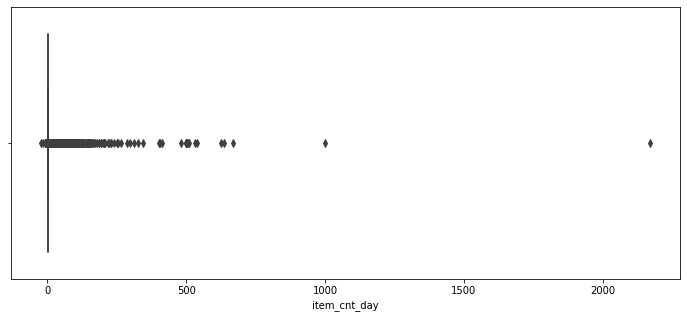

In [37]:
#Outliers analysis on item_cnt_day column in train data 
plt.figure(figsize=(12,5))
sns.boxplot(x=train_new.item_cnt_day)
for i in range(90,101):
  print("{}th percenile value of item count: {}".format(i,np.percentile(train_new.item_cnt_day.values,i)))
outlier_itemcount = np.percentile(train_new.item_cnt_day.values,100)

99% dataset has 7 or less sellings



90th percenile value of item price: 1999.0
91th percenile value of item price: 2149.0
92th percenile value of item price: 2399.0
93th percenile value of item price: 2571.72727273
94th percenile value of item price: 2599.0
95th percenile value of item price: 2799.0
96th percenile value of item price: 2999.0
97th percenile value of item price: 3199.0
98th percenile value of item price: 3599.0
99th percenile value of item price: 6090.0
100th percenile value of item price: 307980.0


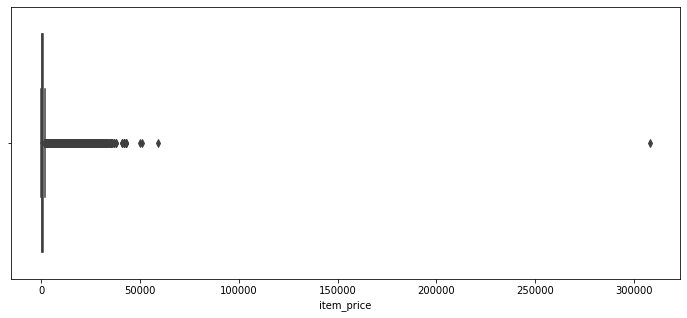

In [38]:
plt.figure(figsize=(12,5))
sns.boxplot(x=train_new .item_price)
for i in range(90,101):
  print("{}th percenile value of item price: {}".format(i,np.percentile(train_new .item_price.values,i)))
outlier_item_price = np.percentile(train_new .item_price.values,100)

99% dataset has 4990 or less item price

# Shop wise selling

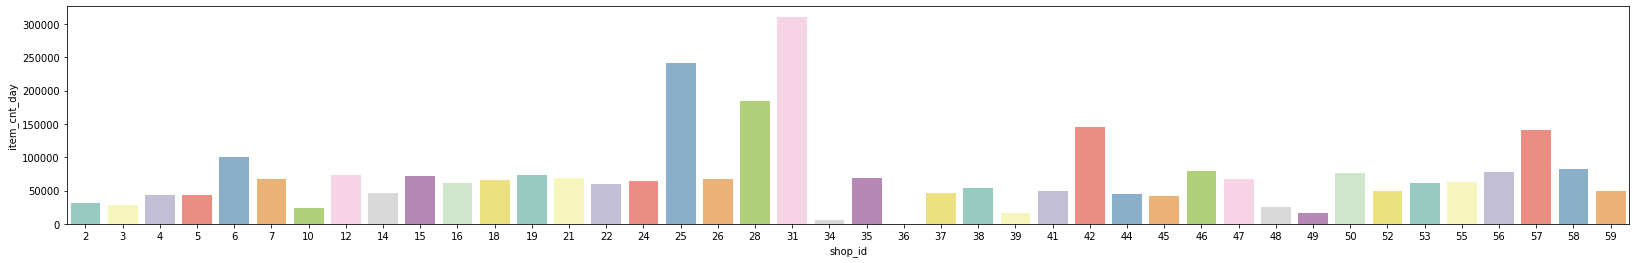

In [39]:
# plotting a bar graph for the number of items sold in all the shops in new train data 
train_data3 = train_new .groupby(['shop_id'], as_index=False)['item_cnt_day'].sum()
plt.figure(figsize=(28,4))
sns.barplot(x="shop_id",y="item_cnt_day", data=train_data3, palette = 'Set3')
plt.show()

# Catogery wise selling

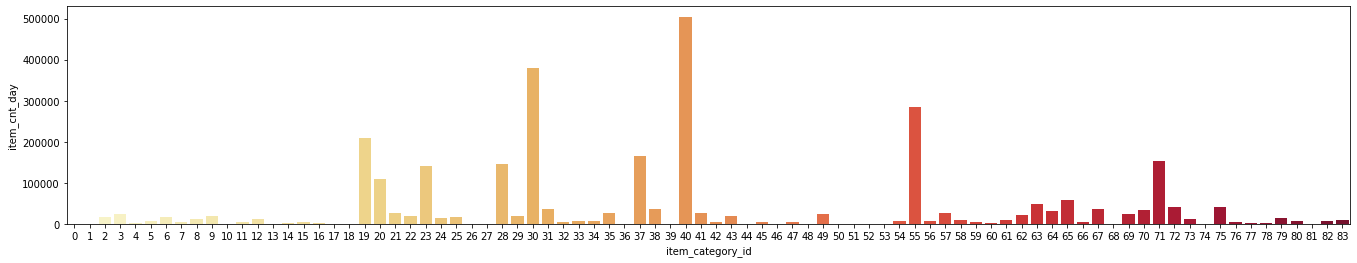

In [40]:
# plotting a bar graph for the number of items sold in different item categories in new train data 
train_new2 = train_new.merge(items_data, on='item_id', how='left' ) #_train_2 = train_new2
train_data3 = train_new2.groupby(['item_category_id'], as_index=False)['item_cnt_day'].sum()
plt.figure(figsize=(23,4))
sns.barplot(x="item_category_id",y="item_cnt_day", data = train_data3, palette = 'YlOrRd')
plt.show()

# Month wise selling


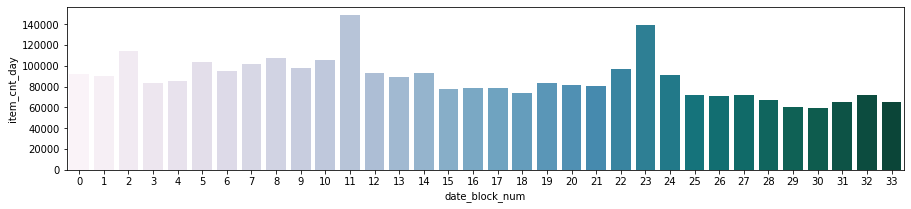

In [41]:
# plotting a bar graph for the number of items sold in all the months from date 2013-01-01 to 2015-10-31
train_data3 = train_new.groupby(['date_block_num'], as_index=False)['item_cnt_day'].sum()
plt.figure(figsize=(15,3))
sns.barplot(x="date_block_num",y="item_cnt_day", data = train_data3, palette = 'PuBuGn')
plt.show()

#Importing library files

In [42]:
!pip install optuna


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 6.4 MB/s 
     |████████████████████████████████| 209 kB 51.8 MB/s 
     |████████████████████████████████| 81 kB 11.1 MB/s 
     |████████████████████████████████| 78 kB 6.7 MB/s 
     |████████████████████████████████| 147 kB 52.9 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 112 kB 58.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=a7a9fe4e68fabceab5ac83a7e740553b1466e51b919c305f5cc154b40134f5bb
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [43]:
#importing all the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler
import pickle
import lightgbm as lgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit , RandomizedSearchCV
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from optuna.integration import lightgbm as lgb_tuner
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from prettytable import PrettyTable
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

#Data Preprocessing Stage

In [44]:
#Reading sales,items,item_cat,test csv files for data preprocessing stage 
sales_new = pd.read_csv("sales_train.csv") #sales

items_new = pd.read_csv("items.csv")

item_cat_new = pd.read_csv("item_categories.csv")

test_new = pd.read_csv("test.csv")


In [45]:
# Joining the data sets
datatrain = sales_new.join(items_new, on='item_id', rsuffix='_').drop(['item_id_','item_name'], axis=1) #train
# Removing the outliers
datatrain = datatrain[(datatrain.item_price < 50000 )& (datatrain.item_cnt_day < 1000)]
#Removing the negative item price and item count day
datatrain = datatrain[(datatrain.item_price > 0) & (datatrain.item_cnt_day >= 0)].reset_index(drop = True)

# Cleaning the shops data as we have different shop ids for same shop names like 0-57, 1-58, 11,10, 40-39 and we dont have 0,1,11 and 40 shop_id in test data so we are replacing these with shop_id which shares a similar names
datatrain.loc[datatrain.shop_id == 0, 'shop_id'] = 57

datatrain.loc[datatrain.shop_id == 1, 'shop_id'] = 58

datatrain.loc[datatrain.shop_id == 11, 'shop_id'] = 10

datatrain.loc[datatrain.shop_id == 40, 'shop_id'] = 39

In [46]:
# Aranging columns in train data and generating revenue 
monthly_datatrain = datatrain[['date', 'date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_cnt_day']]
monthly_datatrain['revenue'] = monthly_datatrain['item_price'] * monthly_datatrain['item_cnt_day']

# Group by month in this case "date_block_num" and aggregate features.
monthly_datatrain = monthly_datatrain.sort_values('date').groupby(['date_block_num', 'shop_id', 'item_category_id', 'item_id'], as_index=False)
monthly_datatrain = monthly_datatrain.agg({ 'item_cnt_day':['sum', 'mean'],'item_price':['mean'], 'revenue':['sum']})

# Renaming the columns
monthly_datatrain.columns = ['date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_cnt_month', 'mean_item_cnt', 'mean_item_price', 'revenue_month']


In [47]:
#printing the top 5 rows in train data after changes 
monthly_datatrain.head()

,date_block_num,shop_id,item_category_id,item_id,item_cnt_month,mean_item_cnt,mean_item_price,revenue_month
0,0,2,2,5572,9.0,1.285714,1532.857143,13910.00
1,0,2,2,5573,2.0,1.000000,924.000000,1848.00
2,0,2,2,5575,4.0,1.000000,955.005000,3820.02
3,0,2,2,5576,3.0,1.000000,2490.000000,7470.00
4,0,2,2,5632,1.0,1.000000,2390.000000,2390.00


In [48]:
##### reducing the usage of memory the data consumed 
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in tqdm(df.columns):
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

monthly_datatrain = reduce_mem_usage(monthly_datatrain)


  0%|          | 0/8 [00:00<?, ?it/s]

Memory usage after optimization is: 22.99 MB
Decreased by 76.6%


In [49]:
# Building the data set with all the possible combinations of ['date_block_num','shop_id','item_id'] 
shop_ids = test_new['shop_id'].unique()
item_ids = test_new['item_id'].unique()
all_posible = []
for i in tqdm(range(34)):
    for shop in shop_ids:
        for item in item_ids:
            all_posible.append([i, shop, item])
    
empty_data = pd.DataFrame(all_posible, columns=['date_block_num','shop_id','item_id']) #empty_df

# Create a test set for month 34.
test_new["date_block_num"] = 34
test_new["date_block_num"] = test_new["date_block_num"].astype(np.int8)
test_new["shop_id"] = test_new.shop_id.astype(np.int8)
test_new["item_id"] = test_new.item_id.astype(np.int16)

# Concatenating the test set to empty data.
empty_data = pd.concat([empty_data, test_new.drop(["ID"],axis = 1)], ignore_index=True, sort=False, keys=["date_block_num", "shop_id", "item_id"])
empty_data.fillna( 0, inplace = True )

  0%|          | 0/34 [00:00<?, ?it/s]

In [50]:
# Merging the train set with the complete set and fill missing records with 0
monthly_datatrain = pd.merge(empty_data, monthly_datatrain, on=['date_block_num','shop_id','item_id'], how='left')
monthly_datatrain.fillna(0, inplace=True)

# Adding the item category id again for test block 34
monthly_datatrain = monthly_datatrain.drop(['item_category_id'], axis=1).join(items_new, on='item_id', rsuffix='_').drop(['item_id_','item_name'], axis=1)

# Aranging the columns 
monthly_datatrain = monthly_datatrain[['date_block_num', 'shop_id', 'item_category_id', 'item_id', 'revenue_month', 'item_cnt_month', 'mean_item_cnt','mean_item_price']]

monthly_datatrain['item_cnt_month'] = monthly_datatrain['item_cnt_month'].fillna(0).clip(0, 20)

# Extracting the time based features like month
monthly_datatrain['month'] = monthly_datatrain['date_block_num'].apply(lambda x: (x % 12))

# Add mean_of_date_block_shop_mean
mean_of_date_block_shop = monthly_datatrain.groupby(['date_block_num', 'shop_id']).agg({'item_cnt_month': ['mean']})
mean_of_date_block_shop.columns = ['mean_of_date_block_shop']
mean_of_date_block_shop.reset_index(inplace=True)
monthly_datatrain = pd.merge(monthly_datatrain, mean_of_date_block_shop, on=['date_block_num', 'shop_id'], how='left')

# Add mean_of_date_block_item
mean_of_date_block_item = monthly_datatrain.groupby(['date_block_num', 'item_id']).agg({'item_cnt_month': ['mean']})
mean_of_date_block_item.columns = ['mean_of_date_block_item']
mean_of_date_block_item.reset_index(inplace=True)
monthly_datatrain = pd.merge(monthly_datatrain, mean_of_date_block_item, on=['date_block_num', 'item_id'], how='left')

# Add mean_of_date_category
mean_of_date_category = monthly_datatrain.groupby(['date_block_num', 'item_category_id']).agg({'item_cnt_month': ['mean']})
mean_of_date_category.columns = ['mean_of_date_category']
mean_of_date_category.reset_index(inplace=True)
monthly_datatrain = pd.merge(monthly_datatrain, mean_of_date_category, on=['date_block_num', 'item_category_id'], how='left')

monthly_datatrain.fillna(0, inplace=True)
monthly_datatrain = reduce_mem_usage(monthly_datatrain)


  0%|          | 0/12 [00:00<?, ?it/s]

Memory usage after optimization is: 214.49 MB
Decreased by 53.1%


In [51]:
# Defining the function to compute lag features
def lag_feature( df,lags, cols ):
    for col in cols:
        tmp = df[["date_block_num", "shop_id","item_id",col ]]
        print(col)
        for i in tqdm(range(1,lags+1)):
            shifted = tmp.copy()
            shifted.columns = ["date_block_num", "shop_id", "item_id", col + "_lag_"+str(i)]
            shifted.date_block_num = shifted.date_block_num + i
            df = pd.merge(df, shifted, on=['date_block_num','shop_id','item_id'], how='left')
    return df


In [52]:
# Adding lag features 
monthly_datatrain = lag_feature( monthly_datatrain, 3 , ['item_cnt_month','revenue_month','mean_item_cnt','mean_item_price', 'mean_of_date_block_item','mean_of_date_block_item','mean_of_date_category'] )

# filling the null values with zeros and optimizing the memory 
monthly_datatrain = monthly_datatrain.fillna(0)
monthly_datatrain = reduce_mem_usage(monthly_datatrain)

item_cnt_month


  0%|          | 0/3 [00:00<?, ?it/s]

revenue_month


  0%|          | 0/3 [00:00<?, ?it/s]

mean_item_cnt


  0%|          | 0/3 [00:00<?, ?it/s]

mean_item_price


  0%|          | 0/3 [00:00<?, ?it/s]

mean_of_date_block_item


  0%|          | 0/3 [00:00<?, ?it/s]

mean_of_date_block_item


  0%|          | 0/3 [00:00<?, ?it/s]

mean_of_date_category


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Memory usage after optimization is: 557.68 MB
Decreased by 0.0%


In [53]:
# Adding the quarter mean count
monthly_datatrain['qmean_item_cnt'] = monthly_datatrain[['item_cnt_month_lag_1', 
                                    'item_cnt_month_lag_2', 
                                    'item_cnt_month_lag_3']].mean(skipna=True, axis=1)
# Add quarter std count
monthly_datatrain['qstd_item_cnt'] = monthly_datatrain[['item_cnt_month_lag_1', 
                                    'item_cnt_month_lag_2', 
                                    'item_cnt_month_lag_3']].std(skipna=True, axis=1)
# Add quarter min count
monthly_datatrain['qmin_item_cnt'] = monthly_datatrain[['item_cnt_month_lag_1', 
                                    'item_cnt_month_lag_2', 
                                    'item_cnt_month_lag_3']].min(skipna=True, axis=1)
# Add quarter max count
monthly_datatrain['qmax_item_cnt'] = monthly_datatrain[['item_cnt_month_lag_1', 
                                    'item_cnt_month_lag_2', 
                                    'item_cnt_month_lag_3']].max(skipna=True, axis=1)

In [77]:
X = monthly_datatrain.drop(['item_cnt_month','mean_item_price','revenue_month','mean_item_cnt', 'mean_of_date_block_item','mean_of_date_block_item','mean_of_date_category'], axis=1)
y = monthly_datatrain['item_cnt_month']

#Normalizing the Dataset with MinMaxScaler method
scaler = MinMaxScaler()
for col in tqdm(X.columns[4:]):
    X[col] = scaler.fit_transform(X[col].values.reshape(-1,1))

# saving the final preprosessed data into drive 
X = reduce_mem_usage(X)
with open('D:\Capstone\Predict_furure_sales\preprocessed_set','wb') as loc:
    pickle.dump((X,y),loc)

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Memory usage after optimization is: 479.03 MB
Decreased by 15.2%


#Train test split

In [78]:
# Loading the preprocessed data
with open('D:\Capstone\Predict_furure_sales\preprocessed_set','rb') as loc:
    X, y = pickle.load(loc)

In [79]:
# slpitting data into train,validation and test 
X_train = X[X['date_block_num']<33]
X_train = X_train[X['date_block_num']>2]
y_train = y[X['date_block_num']<33]
y_train = y_train[X['date_block_num']>2]

X_val = X[X['date_block_num']==33]
y_val = y[X['date_block_num']==33]

X_test = X[X['date_block_num']==34]


In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape)

(6426000, 31) (214200, 31) (214200, 31)
(6426000,) (214200,)


#Machine Learning Algorithms

Random Forest Regressor

In [82]:
alpha = [3,5,7,9]

train_score = []
val_score = []
for i in tqdm(alpha):
    
    print("alpha = {} ".format(i))
    _model = RandomForestRegressor(max_depth = i)
    _model.fit(X_train, y_train)
    rmse_train = mean_squared_error(_model.predict(X_train).clip(0,20),y_train, squared=False)
    rmse_val = mean_squared_error(_model.predict(X_val).clip(0,20),y_val, squared=False)

    if val_score:
        if sorted(val_score)[0] > rmse_val:
            print("model saving.....")
            with open('D:\Capstone\Predict_furure_sales\random_forest','wb') as loc:
                pickle.dump(_model,loc)
    else:
        print("model saving.....")
        with open('D:\Capstone\Predict_furure_sales\random_forest','wb') as loc:
            pickle.dump(_model,loc)

    train_score.append(rmse_train)
    val_score.append(rmse_val)
    print("Training Loss is {} ".format(rmse_train))
    print("Validation Loss is {} ".format(rmse_val))
    print("-"*50)
    
with open('D:\Capstone\Predict_furure_sales\random_forest_log','wb') as loc:
    pickle.dump((train_score,val_score,alpha),loc)

  0%|          | 0/4 [00:00<?, ?it/s]

alpha = 3 
model saving.....
Training Loss is 0.7991410059909906 
Validation Loss is 0.9179208557832629 
--------------------------------------------------
alpha = 5 
model saving.....
Training Loss is 0.7743889428977822 
Validation Loss is 0.9038141110811121 
--------------------------------------------------
alpha = 7 
model saving.....
Training Loss is 0.7555777239061906 
Validation Loss is 0.892465159210123 
--------------------------------------------------
alpha = 9 
model saving.....
Training Loss is 0.7320304828752356 
Validation Loss is 0.884193006930114 
--------------------------------------------------


In [83]:
with open('D:\Capstone\Predict_furure_sales\random_forest','rb') as loc:
    random_forest = pickle.load(loc)  
with open('D:\Capstone\Predict_furure_sales\random_forest_log','rb') as loc:
    train_score,val_score,alpha = pickle.load(loc)

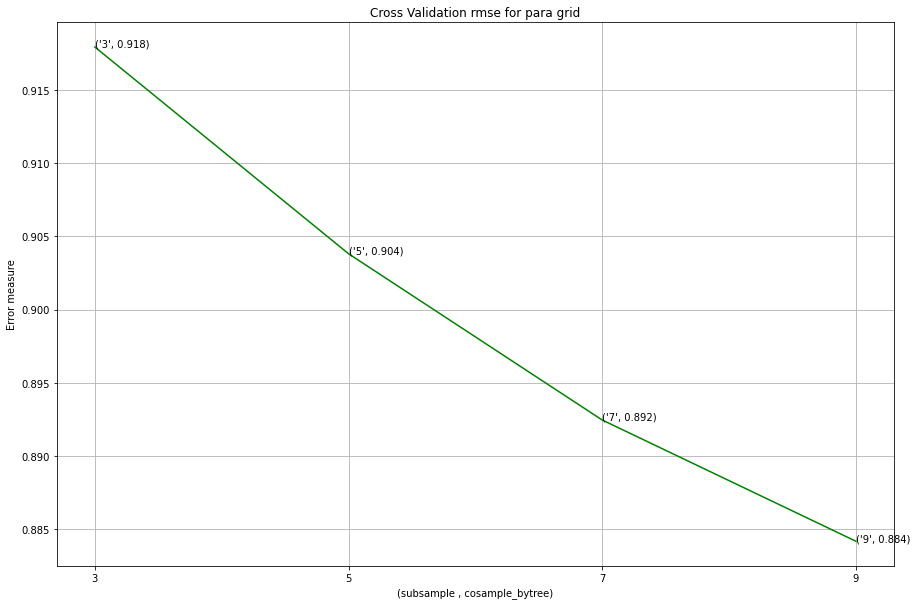

In [84]:
params = [str(i) for i in alpha]
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(params, val_score,c='g')
for i, txt in enumerate(np.round(val_score,3)):
    ax.annotate((params[i],np.round(txt,3)), (params[i],val_score[i]))
plt.grid()
plt.title("Cross Validation rmse for para grid")
plt.xlabel("(subsample , cosample_bytree)")
plt.ylabel("Error measure")
plt.show()

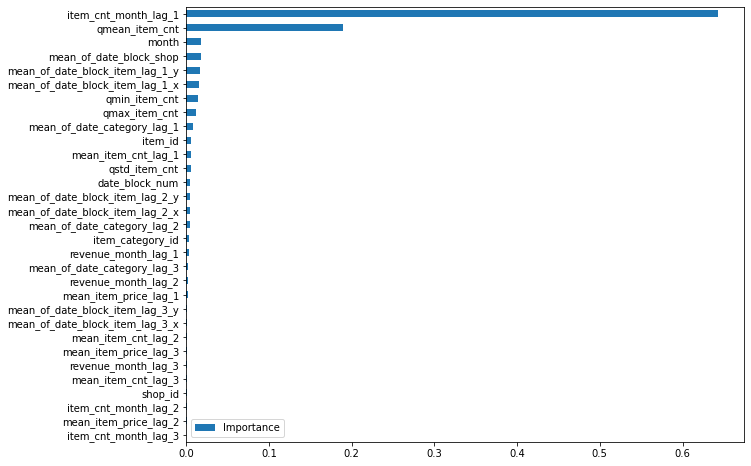

In [85]:
feat_importances = pd.DataFrame(random_forest.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
feat_importances.plot.barh(figsize=(10,8))

#Decision Tree Regression

In [63]:
alpha = [3,5,7,9,12]

train_score = []
val_score = []
for i in tqdm(alpha):
    
    print("alpha = {} ".format(i))
    _model = DecisionTreeRegressor(max_depth = i)
    _model.fit(X_train, y_train)
    rmse_train = mean_squared_error(_model.predict(X_train).clip(0,20),y_train, squared=False)
    rmse_val = mean_squared_error(_model.predict(X_val).clip(0,20),y_val, squared=False)

    if val_score:
        if sorted(val_score)[0] > rmse_val:
            print("model saving.....")
            with open('D:\Capstone\Predict_furure_sales\Decision_tree','wb') as loc:
                pickle.dump(_model,loc)
    else:
        print("model saving.....")
        with open('D:\Capstone\Predict_furure_sales\Decision_tree','wb') as loc:
            pickle.dump(_model,loc)

    train_score.append(rmse_train)
    val_score.append(rmse_val)
    print("Training Loss is {} ".format(rmse_train))
    print("Validation Loss is {} ".format(rmse_val))
    print("-"*50)
    
with open('D:\Capstone\Predict_furure_sales\Decision_tree_log','wb') as loc:
    pickle.dump((train_score,val_score,alpha),loc)

  0%|          | 0/5 [00:00<?, ?it/s]

alpha = 3 
model saving.....
Training Loss is 0.8036969091426813 
Validation Loss is 0.92170921301671 
--------------------------------------------------
alpha = 5 
model saving.....
Training Loss is 0.7802805415887699 
Validation Loss is 0.9040524511661311 
--------------------------------------------------
alpha = 7 
Training Loss is 0.7632585214071455 
Validation Loss is 0.9047546937434106 
--------------------------------------------------
alpha = 9 
model saving.....
Training Loss is 0.7441414902995881 
Validation Loss is 0.8958276317498391 
--------------------------------------------------
alpha = 12 
Training Loss is 0.7004451053920728 
Validation Loss is 0.9222361789274149 
--------------------------------------------------


In [86]:
with open('D:\Capstone\Predict_furure_sales\Decision_tree','rb') as loc:
    decision_tree = pickle.load(loc)
with open('D:\Capstone\Predict_furure_sales\Decision_tree_log','rb') as loc:
    train_score,val_score,alpha = pickle.load(loc)

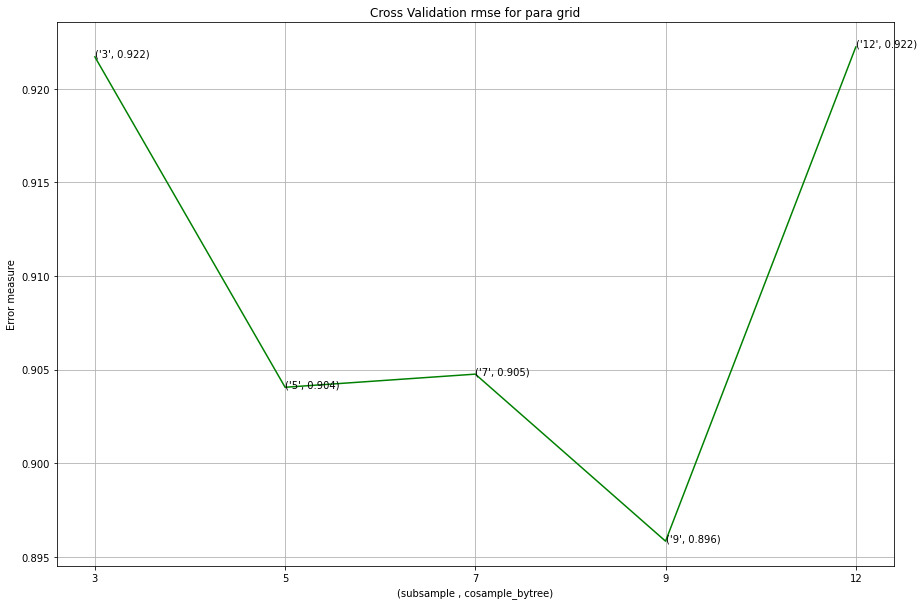

In [87]:
params = [str(i) for i in alpha]
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(params, val_score,c='g')
for i, txt in enumerate(np.round(val_score,3)):
    ax.annotate((params[i],np.round(txt,3)), (params[i],val_score[i]))
plt.grid()
plt.title("Cross Validation rmse for para grid")
plt.xlabel("(subsample , cosample_bytree)")
plt.ylabel("Error measure")
plt.show()

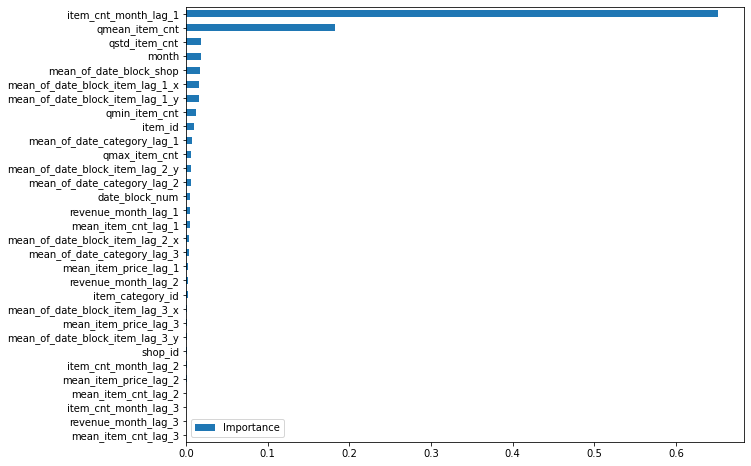

In [88]:
feat_importances = pd.DataFrame(decision_tree.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
feat_importances.plot.barh(figsize=(10,8))

In [90]:

with open('D:\Capstone\Predict_furure_sales\Decision_tree','rb') as loc:
    decision_tree = pickle.load(loc)
with open('D:\Capstone\Predict_furure_sales\Decision_tree_log','rb') as loc:
    decision_tree_log = pickle.load(loc)
with open('D:\Capstone\Predict_furure_sales\random_forest','rb') as loc:
    random_forest = pickle.load(loc)
with open('D:\Capstone\Predict_furure_sales\random_forest_log','rb') as loc:
    random_forest_log = pickle.load(loc)
    
x = PrettyTable()
x.field_names = ["Models Used", "training_rmse" , "validation_rmse"]
x.add_row(["Random Forest Regressor", round(random_forest_log[0][np.argmin(random_forest_log[1])],5), round(min(random_forest_log[1]),5)])
x.add_row(["Decision tree Regressor", round(decision_tree_log[0][np.argmin(decision_tree_log[1])],5), round(min(decision_tree_log[1]),5)])
print(x)



+-------------------------+---------------+-----------------+
|       Models Used       | training_rmse | validation_rmse |
+-------------------------+---------------+-----------------+
| Random Forest Regressor |    0.73203    |     0.88419     |
| Decision tree Regressor |    0.74414    |     0.89583     |
+-------------------------+---------------+-----------------+
